In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.optimizers import Adam
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [13]:
ecg_dataset = pd.read_csv("mitbih_train.csv")
ecg_dataset.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
data = ecg_dataset.drop('0.000000000000000000e+00.88',axis=1)
label = ecg_dataset[['0.000000000000000000e+00.88']]

In [21]:
X_train = data.values
y_train = label.values.reshape(len(X_train))
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])

In [28]:
y_train = tf.keras.utils.to_categorical(y_train, 5).astype(int)

In [24]:
model = Sequential()
model.add(LSTM(374, activation='tanh', input_shape=(1,187), return_sequences=False))
model.add(Dense(5,activation = 'softmax'))
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

In [25]:
model.fit(X_train, y_train, epochs=10, validation_data= (X_train,y_train),batch_size=32)

Train on 87553 samples, validate on 87553 samples
Epoch 1/10
87553/87553 [==============================] - 100s 1ms/step - loss: 0.2600 - accuracy: 0.9282 - val_loss: 0.1742 - val_accuracy: 0.9539
Epoch 2/10
87553/87553 [==============================] - 109s 1ms/step - loss: 0.1619 - accuracy: 0.9557 - val_loss: 0.1378 - val_accuracy: 0.9631
Epoch 3/10
87553/87553 [==============================] - 94s 1ms/step - loss: 0.1330 - accuracy: 0.9631 - val_loss: 0.1180 - val_accuracy: 0.9665
Epoch 4/10
87553/87553 [==============================] - 129s 1ms/step - loss: 0.1162 - accuracy: 0.9672 - val_loss: 0.1007 - val_accuracy: 0.9717
Epoch 5/10
87553/87553 [==============================] - 150s 2ms/step - loss: 0.1026 - accuracy: 0.9710 - val_loss: 0.0931 - val_accuracy: 0.9737
Epoch 6/10
87553/87553 [==============================] - 149s 2ms/step - loss: 0.0948 - accuracy: 0.9727 - val_loss: 0.0966 - val_accuracy: 0.9717
Epoch 7/10
87553/87553 [==============================] - 145s 

Test Data Check

In [26]:
ecg_dataset_test = pd.read_csv("mitbih_test.csv")
data_test = ecg_dataset_test.drop('0.000000000000000000e+00.65',axis=1)
label_test = ecg_dataset_test[['0.000000000000000000e+00.65']]
ecg_dataset_test.tail()

,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
21886,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21887,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.973970,0.913232,0.865510,0.823210,0.746204,0.642082,0.547722,0.426247,0.325380,0.279826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [29]:
X_test = data_test.values
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])
y_test = label_test.values.reshape(len(X_test))
y_test = tf.keras.utils.to_categorical(y_test, 5).astype(int)

In [30]:
actual_test = label_test.values.reshape(len(X_test)).astype(int)

In [40]:
pred = model.predict_classes(X_test)

In [41]:
accuracy_score(actual_test, pred)

0.9732766890502946

In [33]:
test_seq_class_0 = data.iloc[10].values.reshape(1,1,187)
test_seq_class_1 = data.iloc[73482].values.reshape(1,1,187)
test_seq_class_2 = data.iloc[74935].values.reshape(1,1,187)
test_seq_class_3 = data.iloc[80689].values.reshape(1,1,187)
test_seq_class_4 = data.iloc[87542].values.reshape(1,1,187)

In [34]:
def predict_class_ecg (ecg_sequence):
    pred_class = model.predict_classes(ecg_sequence)
    plt.plot(ecg_sequence.reshape(187,))
    return pred_class

array([0], dtype=int64)

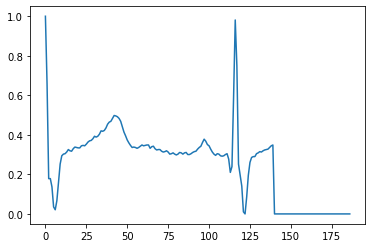

In [35]:
predict_class_ecg(test_seq_class_0)

array([1], dtype=int64)

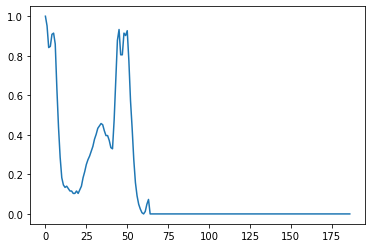

In [36]:
predict_class_ecg(test_seq_class_1)

array([2], dtype=int64)

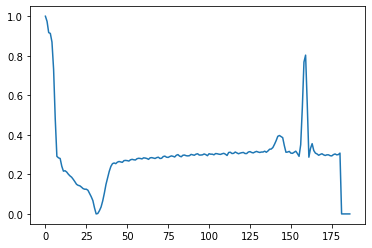

In [37]:
predict_class_ecg(test_seq_class_2)

array([3], dtype=int64)

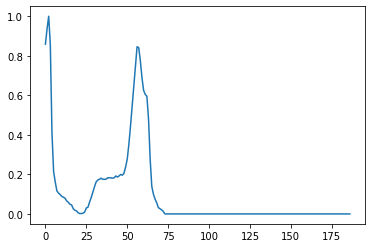

In [38]:
predict_class_ecg(test_seq_class_3)

array([4], dtype=int64)

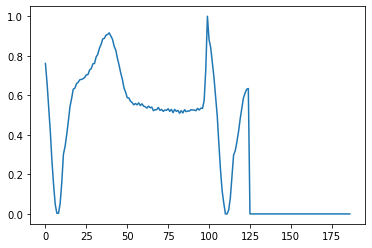

In [39]:
predict_class_ecg(test_seq_class_4)